In [3]:
import pandas as pd 

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.01/data_drop.xlsx")

data

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),X COORDINATE_C(Left),X COORDINATE_D(Heel),X COORDINATE_F(Center),Y COORDINATE_C(Left),FSR DATA_B(Right),FSR DATA_C(Left)
0,0,67.0,260.0,3.325000,6.275333,2.625000,12.434615,33.0,53.0
1,1,68.0,263.0,3.378327,6.325850,2.192308,12.311787,32.0,52.0
2,2,71.0,275.0,3.378182,6.237584,2.250000,12.383636,32.0,51.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
608,608,45.0,338.0,3.217456,6.325820,2.706294,12.665680,27.0,50.0
609,609,45.0,338.0,3.217456,6.325820,2.706294,12.665680,27.0,50.0
610,610,45.0,338.0,3.217456,6.325820,2.706294,12.665680,27.0,50.0
611,611,38.0,328.0,3.179878,6.265182,2.697917,12.681402,30.0,47.0


In [4]:
data.isnull().sum()

Unnamed: 0                 0
FORCE_B(Right)            94
FORCE_C(Left)             94
X COORDINATE_C(Left)      94
X COORDINATE_D(Heel)      94
X COORDINATE_F(Center)    94
Y COORDINATE_C(Left)      94
FSR DATA_B(Right)         94
FSR DATA_C(Left)          94
dtype: int64

In [5]:
data.drop(columns="Unnamed: 0",inplace=True)

FORCE_B(Right)


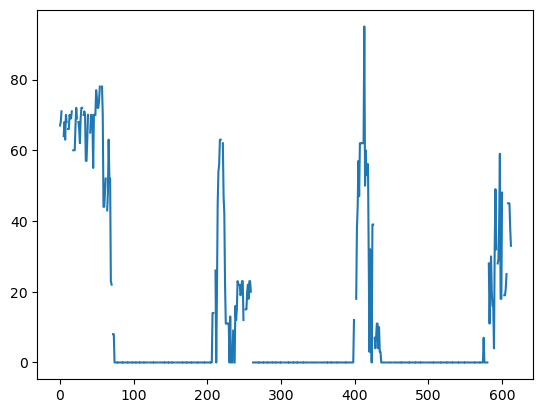

FORCE_C(Left)


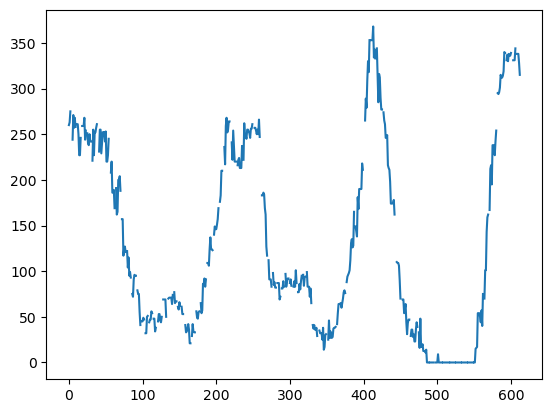

X COORDINATE_C(Left)


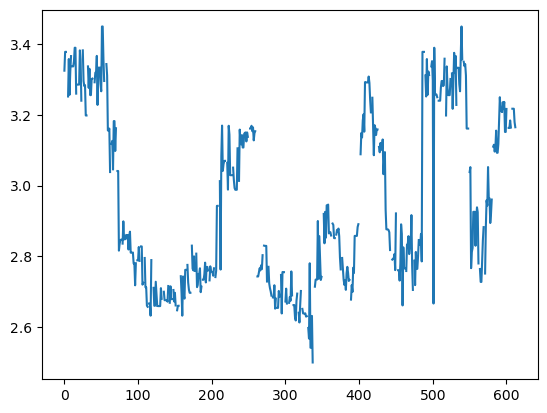

X COORDINATE_D(Heel)


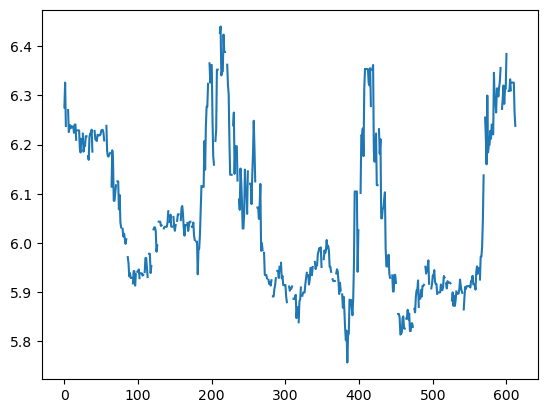

X COORDINATE_F(Center)


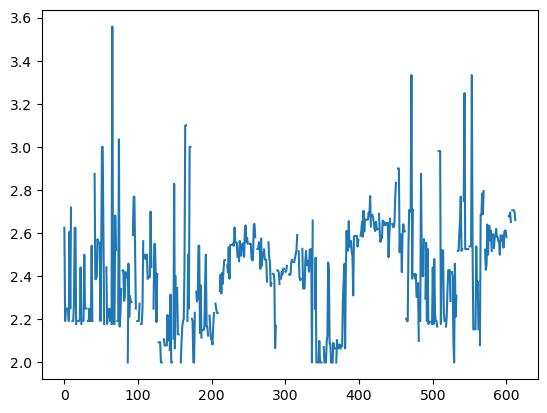

Y COORDINATE_C(Left)


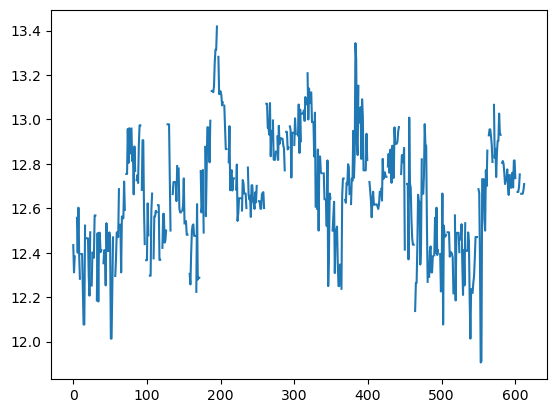

FSR DATA_B(Right)


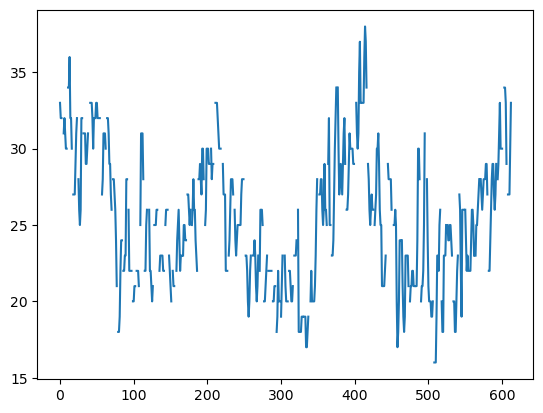

FSR DATA_C(Left)


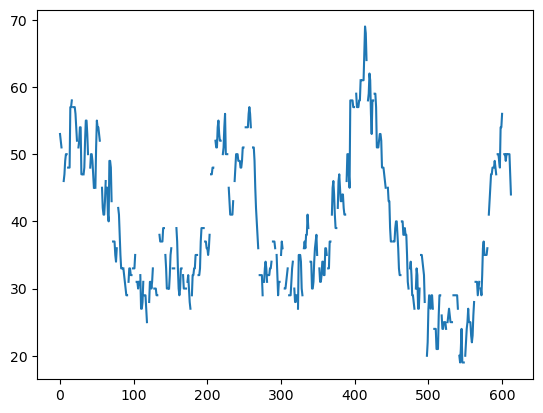

In [6]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    
    
    

In [7]:
data.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left)', 'X COORDINATE_C(Left)',
       'X COORDINATE_D(Heel)', 'X COORDINATE_F(Center)',
       'Y COORDINATE_C(Left)', 'FSR DATA_B(Right)', 'FSR DATA_C(Left)'],
      dtype='object')

In [8]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.01/data_delay.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

In [9]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

In [10]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [11]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [12]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [13]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(519, 1)
(519,)


In [14]:
x_train_R_FORECE_B=x_train_R_FORECE_B.reshape(x_train_R_FORECE_B.shape[0],x_train_R_FORECE_B.shape[1],1)
x_train_R_FSR_B=x_train_R_FSR_B.reshape(x_train_R_FSR_B.shape[0],x_train_R_FSR_B.shape[1],1)
x_test_L_FORECE_C=x_test_L_FORECE_C.reshape(x_test_L_FORECE_C.shape[0],x_test_L_FORECE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [15]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(519, 1, 1)
(519,)


In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=1000, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORECE_B.shape[1], x_train_R_FORECE_B.shape[2])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(400, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
model_cnn_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_36 (TimeDi  (None, None, 1, 1000)    2000      
 stributed)                                                      
                                                                 
 time_distributed_37 (TimeDi  (None, None, 1, 1000)    0         
 stributed)                                                      
                                                                 
 time_distributed_38 (TimeDi  (None, None, 1000)       0         
 stributed)                                                      
                                                                 
 lstm_12 (LSTM)              (None, 400)               2241600   
                                                                 
 dense_12 (Dense)            (None, 1)                 401       
                                                     

In [51]:
model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=1000,verbose=2,batch_size=1)
pred=model_cnn_lstm.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/1000
519/519 - 2s - loss: 7503.2964 - 2s/epoch - 4ms/step
Epoch 2/1000
519/519 - 2s - loss: 8657.9766 - 2s/epoch - 3ms/step
Epoch 3/1000
519/519 - 2s - loss: 7711.5376 - 2s/epoch - 3ms/step
Epoch 4/1000
519/519 - 2s - loss: 7593.1846 - 2s/epoch - 3ms/step
Epoch 5/1000
519/519 - 2s - loss: 7760.1421 - 2s/epoch - 3ms/step
Epoch 6/1000
519/519 - 2s - loss: 7609.0518 - 2s/epoch - 3ms/step
Epoch 7/1000
519/519 - 2s - loss: 7724.7734 - 2s/epoch - 3ms/step
Epoch 8/1000
519/519 - 2s - loss: 7534.4033 - 2s/epoch - 3ms/step
Epoch 9/1000
519/519 - 2s - loss: 7568.1245 - 2s/epoch - 3ms/step
Epoch 10/1000
519/519 - 2s - loss: 7670.7520 - 2s/epoch - 3ms/step
Epoch 11/1000
519/519 - 2s - loss: 7450.8403 - 2s/epoch - 3ms/step
Epoch 12/1000
519/519 - 2s - loss: 7560.7168 - 2s/epoch - 3ms/step
Epoch 13/1000
519/519 - 2s - loss: 7896.3789 - 2s/epoch - 3ms/step
Epoch 14/1000
519/519 - 2s - loss: 7490.1084 - 2s/epoch - 3ms/step
Epoch 15/1000
519/519 - 2s - loss: 7678.9312 - 2s/epoch - 3ms/step
Epoc

In [52]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

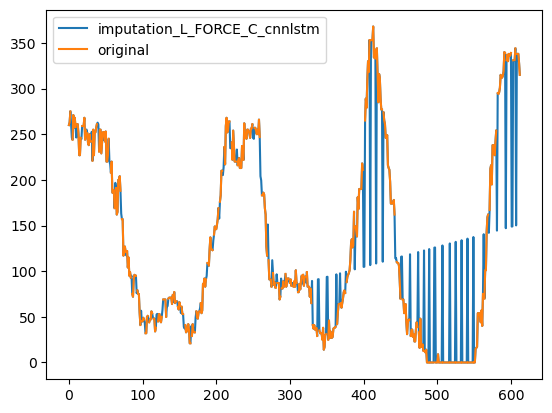

In [53]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_cnnlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()